<a target="_blank" href="https://colab.research.google.com/github/toelt-llc/HSLU-WSCS_2025/blob/master/02%20-%20Easy_Network_with_Keras.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Project - First Fully connected network with Keras

Author: Umberto Michelucci (umberto.michelucci@toelt.ai)

## Exercises

### Exercise 1:
Try to increase the network size (increasing the number of layers and number of neurons) and see if you get better results.

### Exercise 2:
Try to reduce the network size to just one neuron. What kind of neuron do you need to use (activation function, output, etc.) to classify the images? And what results do you get?

### Exercise 3:
Check for overfitting. Is the network overfitting? Can you tell?

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

import matplotlib.pyplot as plt

2025-03-27 07:59:30.637114: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Text(0.5, 1.0, 'Label is 9')

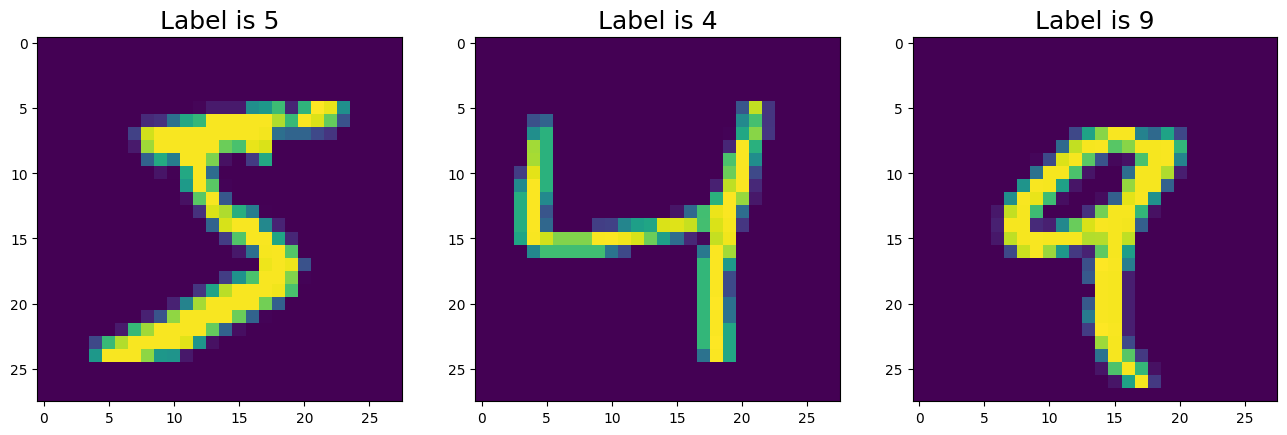

In [5]:
fig = plt.figure(figsize = (16,5))
fig.add_subplot(1,3,1)
plt.imshow(x_train[0])
plt.title("Label is "+ str(y_train[0]), fontsize = 18)
fig.add_subplot(1,3,2)
plt.imshow(x_train[2])
plt.title("Label is "+ str(y_train[2]), fontsize = 18)
fig.add_subplot(1,3,3)
plt.imshow(x_train[4])
plt.title("Label is "+ str(y_train[4]), fontsize = 18)

## Sequential model

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/Users/arnaud/miniconda3/envs/wscs/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8568 - loss: 0.4901 - val_accuracy: 0.9565 - val_loss: 0.1449
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9568 - loss: 0.1508 - val_accuracy: 0.9686 - val_loss: 0.1013
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9680 - loss: 0.1082 - val_accuracy: 0.9718 - val_loss: 0.0894
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9729 - loss: 0.0885 - val_accuracy: 0.9759 - val_loss: 0.0740
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9763 - loss: 0.0761 - val_accuracy: 0.9752 - val_loss: 0.0789
313/313 - 0s - 2ms/step - accuracy: 0.9752 - loss: 0.0789


[0.07894417643547058, 0.9751999974250793]

In [8]:
print(history.history)

{'accuracy': [0.9118000268936157, 0.9571499824523926, 0.9671666622161865, 0.9722333550453186, 0.9759500026702881], 'loss': [0.3025754690170288, 0.14581719040870667, 0.10892041027545929, 0.08978061378002167, 0.0773046687245369], 'val_accuracy': [0.9564999938011169, 0.9685999751091003, 0.9718000292778015, 0.9758999943733215, 0.9751999974250793], 'val_loss': [0.14486680924892426, 0.10126698017120361, 0.08943407982587814, 0.07403215020895004, 0.07894417643547058]}


Let's check how the network is learning by plotting the loss function for the training and test datasets. This is a handy way to check if there is any overfitting or if the network is not learning properly.

### Learning Assessment

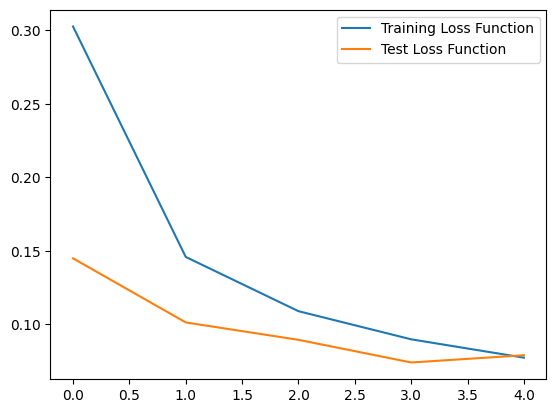

In [9]:
plt.plot(history.history['loss'], label = 'Training Loss Function')
plt.plot(history.history['val_loss'], label = 'Test Loss Function')
plt.legend()
plt.show()

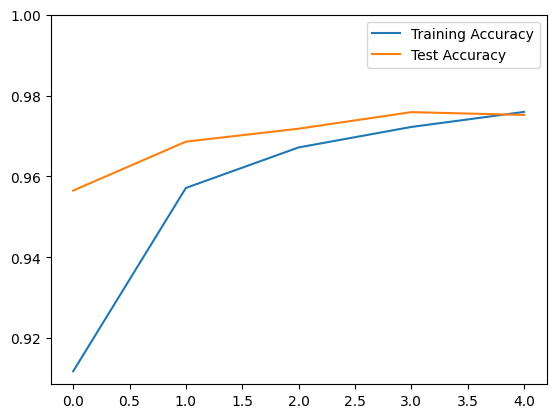

In [10]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.ylim(None, 1)
plt.legend()
plt.show()

### Prediction check

In [11]:
model.predict(x_train[0][np.newaxis,:])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([3.7366183e-11, 6.8071265e-10, 5.6433073e-06, 9.0509012e-02,
       1.4250612e-18, 9.0948522e-01, 3.4666548e-14, 1.5186393e-08,
       1.0673346e-09, 1.0234713e-07], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


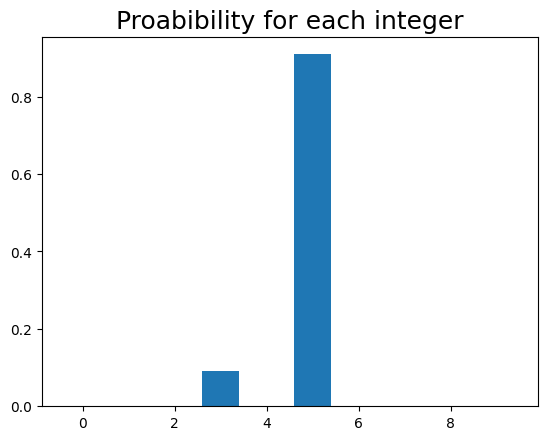

In [12]:
plt.bar(np.arange(0,10,1), model.predict(x_train[0][np.newaxis,:])[0])
plt.title ("Proabibility for each integer", fontsize = 18)
plt.show()

## Functional APIs

Networks can be built with the Sequential approach by using the ```Sequential()``` constructor, or by using functional API, as shown below. The functional API will give much more flexibility to build more flexible network architectures.

In [13]:
input = tf.keras.layers.Input(shape = (28,28), name = 'Input_Layer')
layer = tf.keras.layers.Flatten()(input)
layer = tf.keras.layers.Dense(128, activation='relu')(layer)
layer = tf.keras.layers.Dropout(0.2)(layer)
layer = tf.keras.layers.Dense(10, activation='softmax')(layer)

model = tf.keras.models.Model(inputs=input, outputs=layer)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8607 - loss: 0.4818 - val_accuracy: 0.9594 - val_loss: 0.1423
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9550 - loss: 0.1531 - val_accuracy: 0.9689 - val_loss: 0.1007
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9668 - loss: 0.1102 - val_accuracy: 0.9742 - val_loss: 0.0847
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9747 - loss: 0.0839 - val_accuracy: 0.9762 - val_loss: 0.0765
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9778 - loss: 0.0699 - val_accuracy: 0.9762 - val_loss: 0.0769
313/313 - 0s - 1ms/step - accuracy: 0.9762 - loss: 0.0769


[0.07688270509243011, 0.9761999845504761]

In [16]:
model.predict(x_train[0][np.newaxis,:])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([4.2543174e-11, 3.0499523e-09, 1.0045119e-09, 3.6373017e-03,
       1.5208517e-19, 9.9636275e-01, 6.2041735e-13, 7.9954637e-10,
       1.6697822e-10, 1.2426259e-08], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


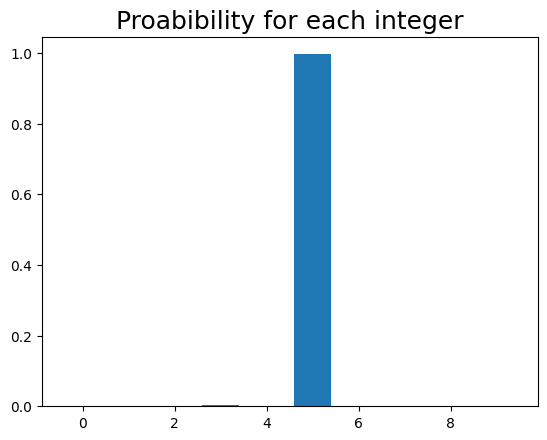

In [17]:
plt.bar(np.arange(0,10,1), model.predict(x_train[0][np.newaxis,:])[0])
plt.title ("Proabibility for each integer", fontsize = 18)
plt.show()

In [18]:
print(y_train[0])

5


## Custom Training Loop - Advanced (can be skipped)

In [19]:
input = tf.keras.layers.Input(shape = (28,28), name = 'Input_Layer')
layer = tf.keras.layers.Flatten()(input)
layer = tf.keras.layers.Dense(128, activation='relu')(layer)
layer = tf.keras.layers.Dropout(0.2)(layer)
layer = tf.keras.layers.Dense(10, activation='softmax')(layer)

model = tf.keras.models.Model(inputs=input, outputs=layer)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
batch_size = 32

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
val_dataset = val_dataset.batch(batch_size)

In [21]:
epochs = 5
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss_fn(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * batch_size))


Start of epoch 0


/Users/arnaud/miniconda3/envs/wscs/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Training loss (for one batch) at step 0: 2.2215
Seen so far: 32 samples
Training loss (for one batch) at step 200: 2.1354
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 2.0237
Seen so far: 12832 samples
Training loss (for one batch) at step 600: 1.8567
Seen so far: 19232 samples
Training loss (for one batch) at step 800: 1.8344
Seen so far: 25632 samples
Training loss (for one batch) at step 1000: 1.6913
Seen so far: 32032 samples
Training loss (for one batch) at step 1200: 1.5927
Seen so far: 38432 samples
Training loss (for one batch) at step 1400: 1.4003
Seen so far: 44832 samples
Training loss (for one batch) at step 1600: 1.2418
Seen so far: 51232 samples
Training loss (for one batch) at step 1800: 1.0843
Seen so far: 57632 samples


2025-03-27 08:01:04.855972: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Start of epoch 1
Training loss (for one batch) at step 0: 1.0920
Seen so far: 32 samples
Training loss (for one batch) at step 200: 1.2554
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 1.0151
Seen so far: 12832 samples
Training loss (for one batch) at step 600: 0.9263
Seen so far: 19232 samples
Training loss (for one batch) at step 800: 1.1114
Seen so far: 25632 samples
Training loss (for one batch) at step 1000: 1.0384
Seen so far: 32032 samples
Training loss (for one batch) at step 1200: 0.7706
Seen so far: 38432 samples
Training loss (for one batch) at step 1400: 0.9565
Seen so far: 44832 samples
Training loss (for one batch) at step 1600: 0.8716
Seen so far: 51232 samples
Training loss (for one batch) at step 1800: 0.7388
Seen so far: 57632 samples


2025-03-27 08:01:41.111134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Start of epoch 2
Training loss (for one batch) at step 0: 0.9741
Seen so far: 32 samples
Training loss (for one batch) at step 200: 0.8115
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 0.9679
Seen so far: 12832 samples
Training loss (for one batch) at step 600: 0.6587
Seen so far: 19232 samples
Training loss (for one batch) at step 800: 0.8196
Seen so far: 25632 samples
Training loss (for one batch) at step 1000: 1.0378
Seen so far: 32032 samples
Training loss (for one batch) at step 1200: 0.7353
Seen so far: 38432 samples
Training loss (for one batch) at step 1400: 0.7630
Seen so far: 44832 samples
Training loss (for one batch) at step 1600: 0.6888
Seen so far: 51232 samples
Training loss (for one batch) at step 1800: 0.5080
Seen so far: 57632 samples


2025-03-27 08:02:17.878000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Start of epoch 3
Training loss (for one batch) at step 0: 0.8109
Seen so far: 32 samples
Training loss (for one batch) at step 200: 0.5853
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 0.9001
Seen so far: 12832 samples
Training loss (for one batch) at step 600: 0.4535
Seen so far: 19232 samples
Training loss (for one batch) at step 800: 0.7058
Seen so far: 25632 samples
Training loss (for one batch) at step 1000: 0.8068
Seen so far: 32032 samples
Training loss (for one batch) at step 1200: 0.5979
Seen so far: 38432 samples
Training loss (for one batch) at step 1400: 0.7270
Seen so far: 44832 samples
Training loss (for one batch) at step 1600: 0.3679
Seen so far: 51232 samples
Training loss (for one batch) at step 1800: 0.5304
Seen so far: 57632 samples


2025-03-27 08:02:55.310013: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Start of epoch 4
Training loss (for one batch) at step 0: 0.5190
Seen so far: 32 samples
Training loss (for one batch) at step 200: 0.6159
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 0.7436
Seen so far: 12832 samples
Training loss (for one batch) at step 600: 0.4515
Seen so far: 19232 samples
Training loss (for one batch) at step 800: 0.5920
Seen so far: 25632 samples
Training loss (for one batch) at step 1000: 0.5492
Seen so far: 32032 samples
Training loss (for one batch) at step 1200: 0.6572
Seen so far: 38432 samples
Training loss (for one batch) at step 1400: 0.5132
Seen so far: 44832 samples
Training loss (for one batch) at step 1600: 0.5964
Seen so far: 51232 samples
Training loss (for one batch) at step 1800: 0.5367
Seen so far: 57632 samples


2025-03-27 08:03:30.150494: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [22]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8654 - loss: 0.5263


[0.46347129344940186, 0.8824999928474426]